# **THE SPARKS FOUNDATION**



---



# **DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP AUGUST-2021**

# SUBMITTED BY : **SIMRAN GONSALVES**

## ***TASK 2 - Prediction using Unsupervised ML***

### **From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**



---



---







# **DATA LOADING**

As the first step, all the required libraries and the dataset is imported.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns  # data visualization

In [ ]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['Target']=pd.DataFrame(iris.target)  # adding the target column to the dataframe
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




---



# **DATA PRE-PROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


This dataset has float and integer values.

### **Checking for any Null values**

In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

From the above output we can see that there are no missing values in this dataset.

In [ ]:
df.describe()  # Statistical description of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Here some useful statistical information is obtained, like,

Mean (Average): adding up all the sample values for a given feature, then dividing it by the number of samples.

Median: The middle number in the list of ascending order.

Mode: The value that occurs the most in a list of samples.

Range: The difference between the highest value and the lowest values in a list.

Standard Deviation: used to measure the dispersion of values in a set.



---



# **Data Visualization**

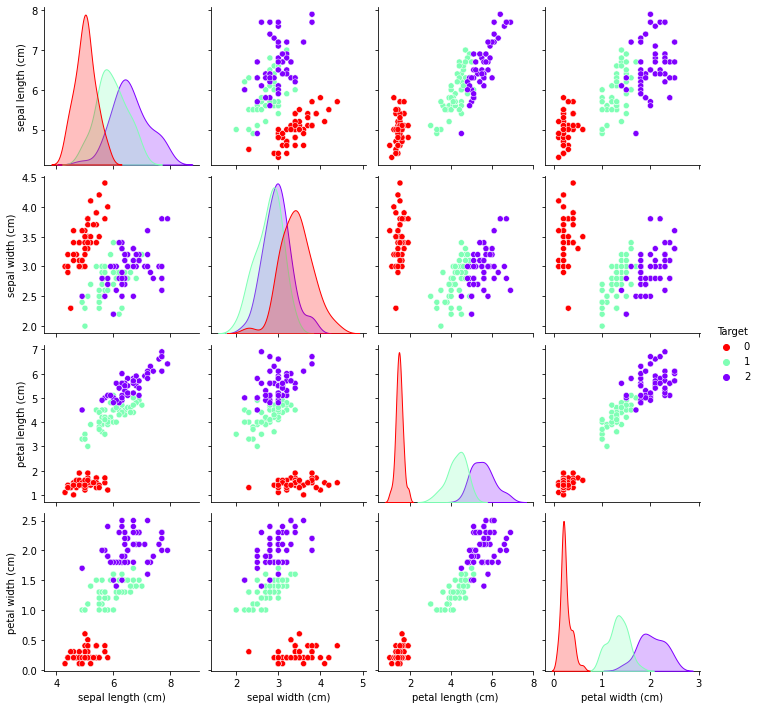

In [ ]:
sns.pairplot(df,hue='Target',diag_kind='kde',palette='rainbow_r')

The above pairplot shows the distribution and relationships between the features



---



# **Data Correlation**

To obtain the detailed information about data correlation, correlation matrix is used. The correlation matrix gives information about how the two variables interact, both the direction and magnitude.

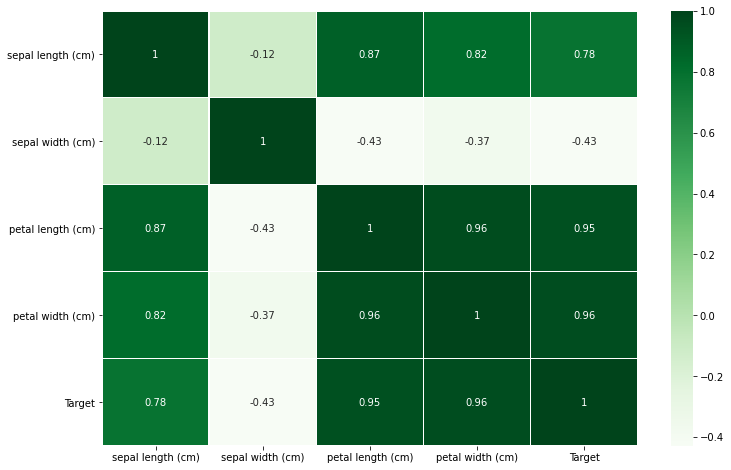

In [ ]:
correlation=df.corr()
colormap=plt.cm.Greens
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap=colormap, annot=True, linewidths=0.2)



---



### **Using the Elbow Method for finding out the optimum number of clusters k**

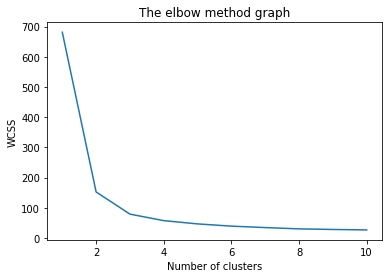

In [ ]:
X = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Here, the optimum number of clusters k = 3



---



# **K Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 


In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

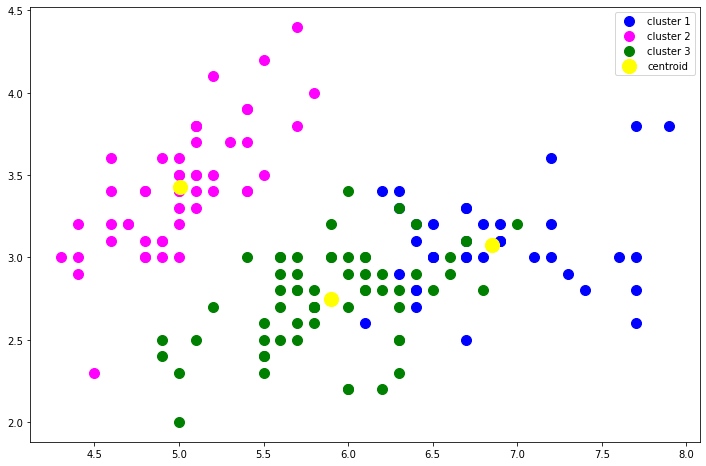

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label='cluster 1') 
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='magenta',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow', label='centroid')
plt.legend()
plt.show()



---



# **Hierarchical Clustering**

Hierarchical clustering is an algorithm that groups similar objects into groups called clusters.

**Average Link** 

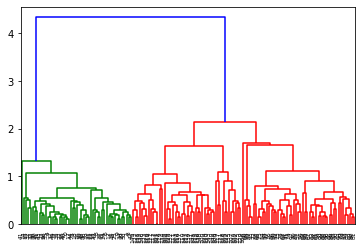

<Figure size 1152x720 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(df,method = 'average')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize=(16,10))
plt.show()

**Single Link**

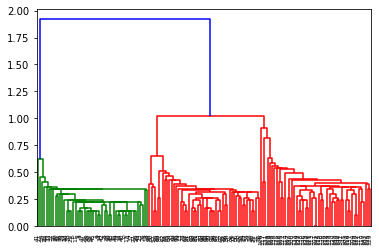

<Figure size 1152x720 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(df,method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize=(16,10))
plt.show()

**Complete Link**

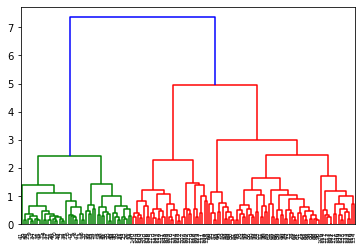

<Figure size 1152x720 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(df,method = 'complete')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize=(16,10))
plt.show()



---



---

